### Reading csvs

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from collections import defaultdict
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import json
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [99]:
#nltk.download('wordnet')

In [100]:

""" df1 = pd.read_csv('./dataset/software_requirements_extended.csv')

# Creating final csv with combined requirements
final_df = pd.DataFrame(pd.concat([df1['Requirement']] ,ignore_index=True).str.replace("'",""))
final_df.rename({0:"Requirement"},axis=1,inplace=True)
final_df.drop_duplicates(subset=['Requirement'])
final_df.head() """

' df1 = pd.read_csv(\'./dataset/software_requirements_extended.csv\')\n\n# Creating final csv with combined requirements\nfinal_df = pd.DataFrame(pd.concat([df1[\'Requirement\']] ,ignore_index=True).str.replace("\'",""))\nfinal_df.rename({0:"Requirement"},axis=1,inplace=True)\nfinal_df.drop_duplicates(subset=[\'Requirement\'])\nfinal_df.head() '

In [101]:
# Use for the first time only 

#final_df.to_csv("./dataset/final_combined2.csv")
final_df = pd.read_csv("./dataset/final_combined2.csv").reset_index()
del final_df['Unnamed: 0']
final_df = final_df.drop(['index'], axis=1)

In [102]:
final_df=final_df.dropna()
print(final_df.describe())
final_df.shape

                                              Requirement  \
count                                                 954   
unique                                                953   
top     Only registered customers can purchase streami...   
freq                                                    2   

                                                 Services  
count                                                 954  
unique                                                163  
top     Amazon S3,Amazon CloudFront,Amazon RDS,Amazon ...  
freq                                                  453  


(954, 2)

## General EDA

In [103]:

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

In [104]:
#*********For Requirements************
# Character count 
final_df['char_count'] = final_df['Requirement'].map(lambda x: len(x))
# Word counts
final_df["word_count"] = final_df["Requirement"].map(lambda x: len(x.split()))
# String counts
final_df["hashtag_count"] = final_df["Requirement"].map(lambda x: x.count("#"))
# Average word length
final_df["avg_word_len"] = final_df["Requirement"].map(lambda x: np.mean([len(w) for w in str(x).split()]))

#**************For Services
# Character count 
final_df['char_count_service'] = final_df['Services'].map(lambda x: len(x))
# Word counts
final_df["word_count_service"] = final_df["Services"].map(lambda x: len(x.split()))
# String counts
final_df["hashtag_count_service"] = final_df["Services"].map(lambda x: x.count("#"))
# Average word length
final_df["avg_word_len_service"] = final_df["Services"].map(lambda x: np.mean([len(w) for w in str(x).split()]))

final_df.head(10)

,Requirement,Services,char_count,word_count,hashtag_count,avg_word_len,char_count_service,word_count_service,hashtag_count_service,avg_word_len_service
0,The system shall refresh the display every 60 ...,Amazon EventBridge,54,9,0,5.111111,18,2,0,8.500000
1,The application shall match the color of the s...,"Amazon S3,Amazon Cloudfront",96,16,0,5.062500,27,3,0,8.333333
2,If projected the data must be readable. On ...,"Amazon S3,Amazon Cloudfront,Amazon Amplify",160,30,0,4.233333,42,4,0,9.750000
3,The product shall be available during normal ...,"Amazon S3,Amazon Cloudfront,Amazon Amplify,Ama...",197,36,0,4.444444,75,7,0,9.857143
4,If projected the data must be understandable...,"Amazon S3,Amazon Cloudfront,Amazon Amplify,Ama...",204,35,0,4.771429,94,8,0,10.875000
5,The product shall ensure that it can only be a...,Amazon Cognito,180,29,0,5.206897,14,2,0,6.500000
7,The product shall respond fast to keep up-to-d...,"Amazon RDS,Amazon DynamoDB,Amazon kinesis",70,12,0,4.916667,41,4,0,9.500000
8,The system shall have a MDI form that allows f...,"Amazon RDS,Amazon DynamoDB,Amazon S3,Amazon Cl...",93,19,0,3.947368,54,5,0,10.000000
9,The system shall display Events in a vertical ...,Amazon RDS,60,11,0,4.545455,10,2,0,4.500000
10,The system shall display the Events in a graph...,"Amazon CloudWatch,Amazon QuickSight",55,11,0,4.090909,35,3,0,11.000000


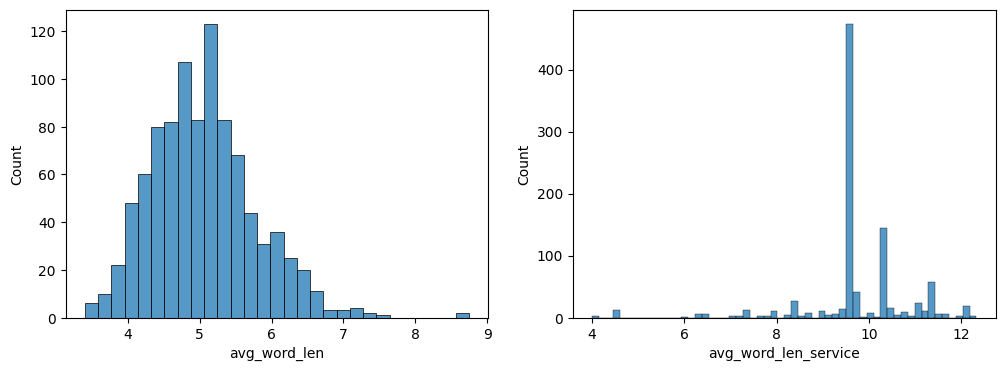

In [105]:
fig, ax = plt.subplots(ncols=2)
sns.histplot(final_df, x='avg_word_len',ax=ax[0])
sns.histplot(final_df, x='avg_word_len_service',ax=ax[1])
fig.set_size_inches(12,4)

In [106]:
# cleaning the data
import re
import string
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    
    text = ''.join([char if ord(char) < 128 else '' for char in text])
    
    return text

In [107]:
final_df["text_clean"] = final_df["Requirement"].map(lambda x: clean_text(x))
final_df["text_clean_services"] = final_df["Services"].map(lambda x: x.lower())
final_df.head()

,Requirement,Services,char_count,word_count,hashtag_count,avg_word_len,char_count_service,word_count_service,hashtag_count_service,avg_word_len_service,text_clean,text_clean_services
0,The system shall refresh the display every 60 ...,Amazon EventBridge,54,9,0,5.111111,18,2,0,8.500000,the system shall refresh the display every 60 ...,amazon eventbridge
1,The application shall match the color of the s...,"Amazon S3,Amazon Cloudfront",96,16,0,5.062500,27,3,0,8.333333,the application shall match the color of the s...,"amazon s3,amazon cloudfront"
2,If projected the data must be readable. On ...,"Amazon S3,Amazon Cloudfront,Amazon Amplify",160,30,0,4.233333,42,4,0,9.750000,if projected the data must be readable on a...,"amazon s3,amazon cloudfront,amazon amplify"
3,The product shall be available during normal ...,"Amazon S3,Amazon Cloudfront,Amazon Amplify,Ama...",197,36,0,4.444444,75,7,0,9.857143,the product shall be available during normal ...,"amazon s3,amazon cloudfront,amazon amplify,ama..."
4,If projected the data must be understandable...,"Amazon S3,Amazon Cloudfront,Amazon Amplify,Ama...",204,35,0,4.771429,94,8,0,10.875000,if projected the data must be understandable...,"amazon s3,amazon cloudfront,amazon amplify,ama..."


In [108]:
# For generating word cloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

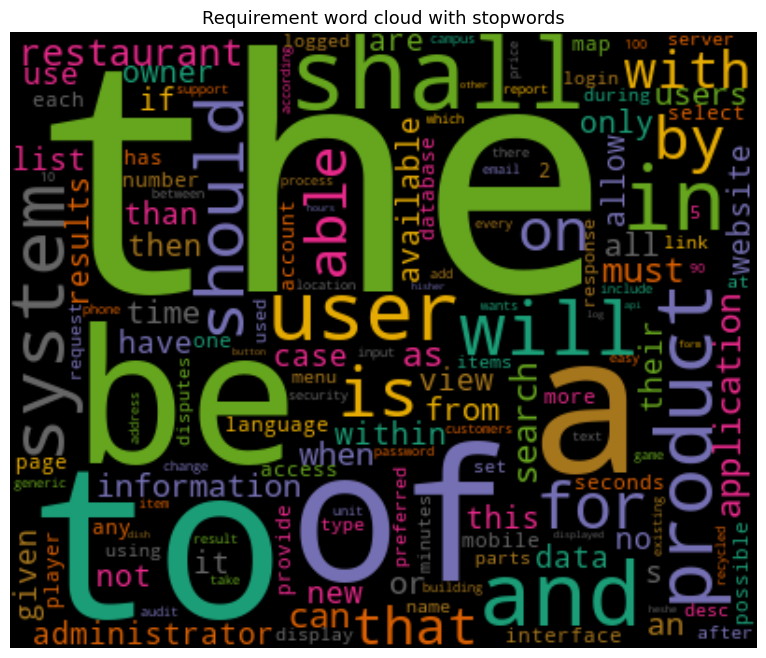

In [109]:
before_clean_words = final_df['text_clean'].str.split()
before_clean_words = before_clean_words.values.tolist()
wordlist =[word for i in before_clean_words for word in i]

from collections import defaultdict

word_dict_with_stopwords=defaultdict(int)
for word in wordlist:
        word_dict_with_stopwords[word]+=1


generate_wordcloud(word_dict_with_stopwords, 'Requirement word cloud with stopwords')

> ### Lemmatizing

In [110]:
# Lemmatizing
lemmatizer = WordNetLemmatizer()

def apply_lemmatize(text):
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

final_df['Requirement'] = final_df['Requirement'].apply(apply_lemmatize)

final_df['Requirement'].head()

0    The system shall refresh the display every 60 ...
1    The application shall match the color of the s...
2    If projected the data must be readable. On a 1...
3    The product shall be available during normal b...
4    If projected the data must be understandable. ...
Name: Requirement, dtype: object

> ### Stemming

> ### Removing Stopwords

In [111]:
# Lemmatizing
ps = PorterStemmer()

def apply_stemming(text):
    
    words = text.split()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

final_df['Requirement'] = final_df['Requirement'].apply(apply_lemmatize)

final_df['Requirement'].head()

0    The system shall refresh the display every 60 ...
1    The application shall match the color of the s...
2    If projected the data must be readable. On a 1...
3    The product shall be available during normal b...
4    If projected the data must be understandable. ...
Name: Requirement, dtype: object

In [112]:
# creating a corpus with removed stopwords
#nltk.download('stopwords')
stop=set(stopwords.words('english'))
corpus = [ word for i in final_df["text_clean"].str.split().values.tolist() for word in i if (word not in stop) ]
final_df['without_stopwords'] = final_df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
corpus[:10]

['system',
 'shall',
 'refresh',
 'display',
 'every',
 '60',
 'seconds',
 'application',
 'shall',
 'match']

In [113]:
# get 15 first most common words from the corpus
common_words = FreqDist(corpus).most_common(15)
common_words

#addition of few more stop words
stop.add('shall')
stop.add('system')
stop.add('product')
stop.add('able')
stop.add('restaurant')

In [114]:
#creating new corpus and common_words with additional stop words
corpus = [ word for i in final_df["text_clean"].str.split().values.tolist() for word in i if (word not in stop) ]
final_df['without_stopwords'] = final_df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
corpus[:10]
common_words = FreqDist(corpus).most_common(15)
common_words

[('user', 301),
 ('search', 111),
 ('application', 107),
 ('must', 102),
 ('information', 99),
 ('users', 98),
 ('time', 93),
 ('administrator', 80),
 ('owner', 76),
 ('use', 74),
 ('data', 70),
 ('available', 65),
 ('within', 63),
 ('list', 60),
 ('website', 55)]

<Axes: >

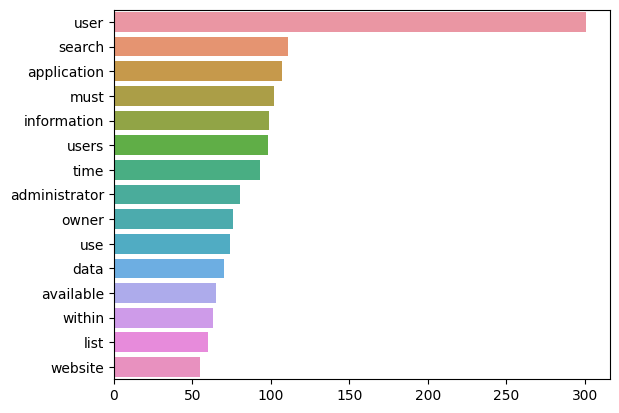

In [115]:
# creating plots for most common words 
words, frequency = [], []
word_freq_dict = {}    
for word, count in common_words:
    words.append(word)
    frequency.append(count)
    word_freq_dict[word] = count

sns.barplot(x = frequency, y = words)

# we can conclude from this graph that generally people don't ask about specific requirement they ususally talk about system as a whole.
# from frequency of "able" and "allow" we can also say that users want security for their application
# from word "data" we can say that people are concerned about the storage and security of the data
# "restaurant" is somewhat strange, maybe there are lot of requirements from the restaurant businesses?

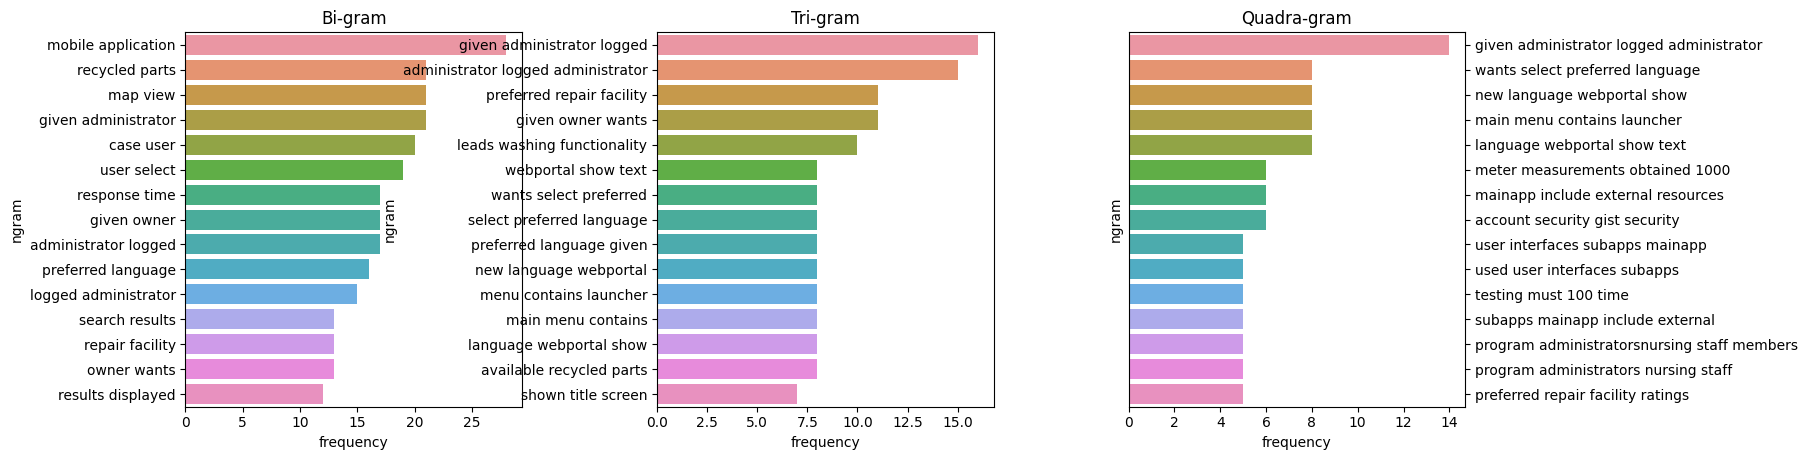

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
def convert_ngram(ngram_range):
    vec = CountVectorizer(stop_words= list(stop), ngram_range=ngram_range)
    # Matrix of ngrams
    bow = vec.fit_transform(final_df["text_clean"])
    # Count frequency of ngrams
    count_values = bow.toarray().sum(axis=0)
    # Create DataFrame from ngram frequencies
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    return ngram_freq

bi_ngram = convert_ngram((2,2))
tri_gram = convert_ngram((3,3))
qudra_gram = convert_ngram((4,4))
fig, axis = plt.subplots(1,3)
sns.barplot(data=bi_ngram, y=bi_ngram['ngram'][:15],x=bi_ngram['frequency'][:15], ax=axis[0])
sns.barplot(data=tri_gram, y=tri_gram['ngram'][:15],x=tri_gram['frequency'][:15], ax=axis[1])
sns.barplot(data=qudra_gram, y=qudra_gram['ngram'][:15],x=qudra_gram['frequency'][:15], ax=axis[2])

axis[0].set_title('Bi-gram')
axis[1].set_title('Tri-gram')
axis[2].set_title('Quadra-gram')
axis[2].yaxis.tick_right()
plt.subplots_adjust(left=0.5,
                    bottom=0.1,
                    right=2.5,
                    wspace=0.4,
                    hspace=0.4)



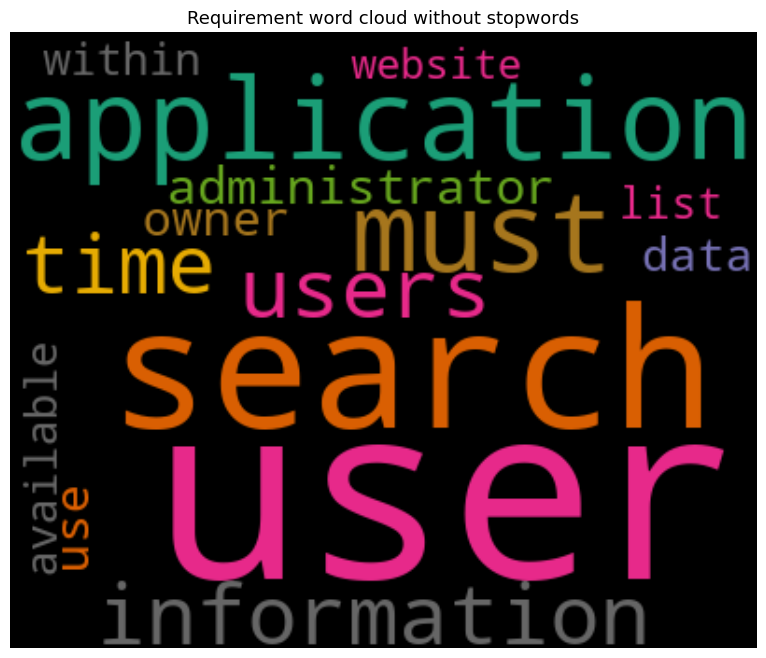

In [117]:
# word cloud after filtering

generate_wordcloud(word_freq_dict, 'Requirement word cloud without stopwords')


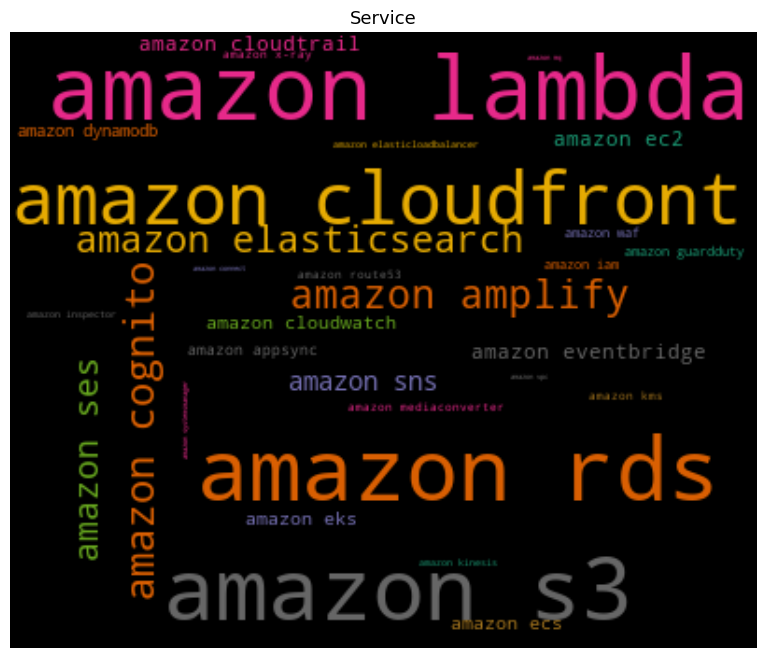

In [118]:
# word cloud for services

services_used = [word.strip() for i in final_df['text_clean_services'] for word in i.split(',') if word!=""]
unique_service = pd.DataFrame({'unique_services':list(set(services_used)), 'frequency': [services_used.count(i) for i in list(set(services_used))]})

generate_wordcloud({unique_service['unique_services'][i]:unique_service['frequency'][i] for i in range(0,len(unique_service))}, 'Service')

In [119]:
# Rule based approach
f = open('./rules.json')
rules = json.loads(f.read())
f.close()

def rule_evaluation(rule, requirement):
    split_method = rule.split(" ")
    found = True
    for word in split_method:
        if (word not in requirement):
            found = False
    
    if found:
        return True
    
    colon_split = rule.split(":")
    found = False
    if colon_split[0] in requirement:
        for word in colon_split[1].split("|"):
            if word in requirement:
                found = True
    
    return found
    


def predict_aws_service(requirement):
   
    tokens = [lemmatizer.lemmatize(i) for i in requirement.lower().split(" ")]
    
    predicted_services = []

    for keyword, services in rules.items():
        if(lemmatizer.lemmatize(keyword) in tokens):
            predicted_services.extend(services)
            
        elif( rule_evaluation(lemmatizer.lemmatize(keyword), tokens) ):
            predicted_services.extend(services)
        
        else:
            predicted_services.extend(rules['default'])
    
    return list(set(predicted_services))

requirements = [
    "The system should schedule an email at 10am",
    "System needs a search bar and an authentication method",
    "Product will extract text from pdf",
    "Users should be able to reset their password directly from email or by clicking on the link sent by text message",
    "Users might need support center for their customers"
    ]

for requirement in requirements:
    predicted_service = predict_aws_service(requirement=requirement)
    print(predicted_service)

#langchain

['Amazon SES', 'Amazon CloudFront', 'Amazon EventBridge', 'Amazon RDS', 'Amazon S3', 'Amazon Lambda']
['Amazon CloudFront', 'Amazon RDS', 'Amazon S3', 'Amazon Lambda', 'Amazon ElasticSearch']
['Amazon CloudFront', 'Amazon RDS', 'Amazon S3', 'Amazon Lambda', 'Amazon Textract']
['Amazon SES', 'Amazon CloudFront', 'Amazon SNS', 'Amazon Cognito', 'Amazon MQ', 'Amazon RDS', 'Amazon S3', 'Amazon Lambda']
['Amazon CloudFront', 'Amazon Connect', 'Amazon RDS', 'Amazon S3', 'Amazon Lambda']


In [133]:
# BoW(Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

train_corpus = [i for i in final_df['without_stopwords'][:-100]]
train_labels = [i for i in final_df['text_clean_services'][:-100]]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_corpus)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X, train_labels)

# Testing example requirement
test_requirements = final_df['text_clean'][-100:]
for requirement in test_requirements:
    test_X = vectorizer.transform([requirement])
    predicted_label = model.predict(test_X)[0]

    print("\nRequirement:",requirement,"\nPredicted AWS Service:", predicted_label)



Requirement: mobile application  profile page desc on the mobile application a user should have a profile page on the profile page a user can edit hisher information which includes the password email address and phone number a user should also be able to choose what language the mobile application should be set to the different language choices are swedish english spanish and french 
Predicted AWS Service: amazon amplify,amazon cloudfront,amazon rds,amazon lambda,amazon elasticsearch

Requirement: required information for registration given the restaurant owner wants to create an account and the restaurant owner does not have an account when the restaurant owner registers on the webportal by providing username and password and address and email address and phone number then the restaurant owner should be able to apply for verification  
Predicted AWS Service: amazon s3,amazon cloudfront,amazon cognito,amazon rds,amazon lambda

Requirement: full information for registration given the r

In [162]:
%%time
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, train_labels)

# Testing using multi nomial model

test_requirements =final_df['text_clean'][-100:]
for requirement in test_requirements:
    test_X = vectorizer.transform([requirement])
    predicted_label = model.predict(test_X)[0]

    print("\nRequirement:",requirement,"\nPredicted AWS Service:", predicted_label)
    





Requirement: mobile application  profile page desc on the mobile application a user should have a profile page on the profile page a user can edit hisher information which includes the password email address and phone number a user should also be able to choose what language the mobile application should be set to the different language choices are swedish english spanish and french 
Predicted AWS Service: amazon amplify,amazon cloudfront,amazon rds,amazon lambda,amazon elasticsearch

Requirement: required information for registration given the restaurant owner wants to create an account and the restaurant owner does not have an account when the restaurant owner registers on the webportal by providing username and password and address and email address and phone number then the restaurant owner should be able to apply for verification  
Predicted AWS Service: amazon s3,amazon cloudfront,amazon rds,amazon lambda,amazon cognito

Requirement: full information for registration given the r

In [ ]:
# TF-IDF(Term Frequency-Inverse Document Frequency)